In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
iris=sns.load_dataset('iris')

In [8]:
iris.to_csv('iris.csv')

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [11]:
iris.shape

(150, 5)

In [12]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [14]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
iris.value_counts('species')

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [18]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot: >

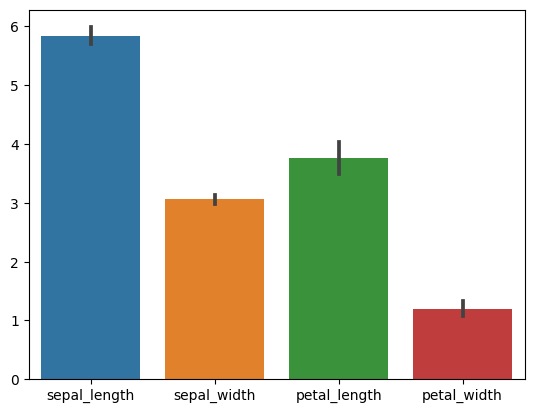

In [19]:
sns.barplot(data=iris)

In [20]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
iris.replace({
    'species':{'setosa':0,'virginica':1,'versicolor':2}
},inplace=True)

In [22]:
target=iris['species']
features=iris.drop(columns=['species'],axis=1)

In [23]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

In [24]:
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=52)

In [26]:
print('features_test=',features_test.shape)
print('features_train=',features_train.shape)
print('target_test=',target_test.shape)
print('target_train=',target_train.shape)

features_test= (30, 4)
features_train= (120, 4)
target_test= (30,)
target_train= (120,)


In [27]:
model = KNeighborsClassifier()

In [28]:
model.fit(features_train,target_train)

KNeighborsClassifier()

In [29]:

train_prediction=model.predict(features_train)
train_prediction

array([2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0,
       1, 0, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1,
       0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 2, 0, 0], dtype=int64)

In [30]:
accuracy_rate=accuracy_score(train_prediction,target_train)
accuracy_rate

0.975

In [34]:
model.fit(features_test,target_test)

KNeighborsClassifier()

In [35]:
test_prediction=model.predict(features_test)

In [36]:
accuracy_rate=accuracy_score(test_prediction,target_test)
accuracy_rate

0.9333333333333333